In [1]:
# Cell 1: Import Libraries and Define Paths

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We'll use this path to locate all CSV files in the "data" folder
DATA_FOLDER = "data"

# Create a list of CSV files to load (e.g., data_0.csv through data_4.csv)
csv_files = sorted(glob.glob(os.path.join(DATA_FOLDER, "data_*.csv")))

print("Found CSV files:", csv_files)


Found CSV files: ['data\\data_0.csv', 'data\\data_1.csv', 'data\\data_2.csv', 'data\\data_3.csv', 'data\\data_4.csv']


In [6]:
# Cell 2: Load and Combine All Sessions

dfs = []
for file in csv_files:
    # Specify column names if needed
    df_temp = pd.read_csv(file, header=None, names=[
        "EMG1","EMG2","EMG3","EMG4","EMG5","EMG6","EMG7","EMG8",
        "FingerJoint1","FingerJoint2","FingerJoint3","FingerJoint4",
        "FingerJoint5","FingerJoint6","FingerJoint7","FingerJoint8",
        "wrist1","wrist2","wrist3"
    ], on_bad_lines='warn')
    dfs.append(df_temp)

# Combine into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

print("Combined dataframe shape:", df.shape)
df.head()


C:\Users\Max\AppData\Local\Temp\ipykernel_496\3711638706.py:6: ParserWarning: Skipping line 2: expected 19 fields, saw 20
Skipping line 3: expected 19 fields, saw 20
Skipping line 4: expected 19 fields, saw 20
Skipping line 5: expected 19 fields, saw 20
Skipping line 6: expected 19 fields, saw 20
Skipping line 7: expected 19 fields, saw 20
Skipping line 8: expected 19 fields, saw 20
Skipping line 9: expected 19 fields, saw 20
Skipping line 10: expected 19 fields, saw 20
Skipping line 11: expected 19 fields, saw 20
Skipping line 12: expected 19 fields, saw 20
Skipping line 13: expected 19 fields, saw 20
Skipping line 14: expected 19 fields, saw 20
Skipping line 15: expected 19 fields, saw 20
Skipping line 16: expected 19 fields, saw 20
Skipping line 17: expected 19 fields, saw 20
Skipping line 18: expected 19 fields, saw 20
Skipping line 19: expected 19 fields, saw 20
Skipping line 20: expected 19 fields, saw 20
Skipping line 21: expected 19 fields, saw 20
Skipping line 22: expected 19 

Combined dataframe shape: (8711, 19)


C:\Users\Max\AppData\Local\Temp\ipykernel_496\3711638706.py:6: ParserWarning: Skipping line 2: expected 19 fields, saw 20
Skipping line 3: expected 19 fields, saw 20
Skipping line 4: expected 19 fields, saw 20
Skipping line 5: expected 19 fields, saw 20
Skipping line 6: expected 19 fields, saw 20
Skipping line 7: expected 19 fields, saw 20
Skipping line 8: expected 19 fields, saw 20
Skipping line 9: expected 19 fields, saw 20
Skipping line 10: expected 19 fields, saw 20
Skipping line 11: expected 19 fields, saw 20
Skipping line 12: expected 19 fields, saw 20
Skipping line 13: expected 19 fields, saw 20
Skipping line 14: expected 19 fields, saw 20
Skipping line 15: expected 19 fields, saw 20
Skipping line 16: expected 19 fields, saw 20
Skipping line 17: expected 19 fields, saw 20
Skipping line 18: expected 19 fields, saw 20
Skipping line 19: expected 19 fields, saw 20
Skipping line 20: expected 19 fields, saw 20
Skipping line 21: expected 19 fields, saw 20
Skipping line 22: expected 19 

EMG1  EMG2  EMG3  EMG4  EMG5  EMG6  EMG7  EMG8  FingerJoint1  FingerJoint2  \
0  EMG1  EMG2  EMG3  EMG4  EMG5  EMG6  EMG7  EMG8  FingerJoint1  FingerJoint2   
1   354   281   174   381   408   182   216   163      19.37991      27.60714   
2   342   274   186   426   453   197   220   161      19.37991      27.60714   
3   237   261   171   424   447   192   212   157      19.37991      27.60714   
4   206   237   155   400   414   182   230   166      17.95908      26.09733   

   FingerJoint3  FingerJoint4  FingerJoint5  FingerJoint6  FingerJoint7  \
0  FingerJoint3  FingerJoint4  FingerJoint5  FingerJoint6  FingerJoint7   
1      60.27888      99.08604      77.37656       91.1316      81.04292   
2      60.27888      99.08604      77.37656       91.1316      81.04292   
3      60.27888      99.08604      77.37656       91.1316      81.04292   
4      58.81847      97.19599      76.74006      90.13197      80.56287   

   FingerJoint8    wrist1    wrist2     wrist3  
0  FingerJoint8    wrist1    wrist2     wrist3  
1      84.24649  22.77411  73.17846  -41.37274  
2      84.24649  22.77411  73.17846  -41.37274  
3      84.24649  22.77411  73.17846  -41.37274  
4      83.67384  23.73329  83.82468   -19.2157

In [8]:
# Cell 3: Basic Descriptive Statistics for EMG Channels

emg_cols = ["EMG1","EMG2","EMG3","EMG4","EMG5","EMG6","EMG7","EMG8"]

# Describe the range, mean, std, etc.
stats_emg = df[emg_cols].describe()
print(stats_emg)


        EMG1  EMG2  EMG3  EMG4  EMG5  EMG6  EMG7  EMG8
count   8711  8711  8711  8711  8711  8711  8711  8711
unique   649   626  1122   577   209   342   460   400
top       69   177   109    60    36    38    38    70
freq     133    58    41    81   178   166   135   124


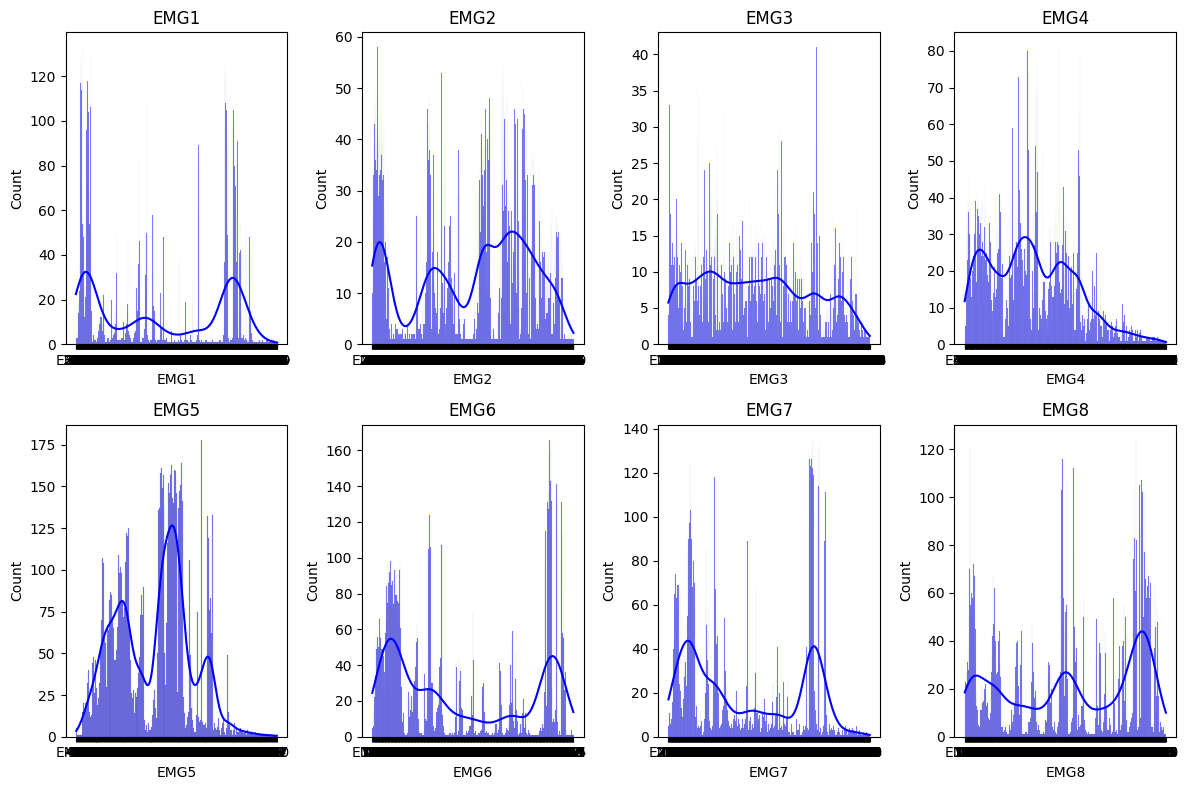

In [9]:
# Cell 4: Distribution Plots (Histogram / KDE) for Each EMG Channel

plt.figure(figsize=(12, 8))
for i, col in enumerate(emg_cols, 1):
    plt.subplot(2, 4, i)  # 2 rows, 4 columns of subplots
    sns.histplot(df[col], kde=True, bins=50, color="blue")
    plt.title(col)

plt.tight_layout()
plt.show()
